In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [53]:
#opening merged and interpolated hist hammoz
#need to make sure they have the same year range
model = xr.open_dataset('E://faks//cda//cmip6//ham_hist_interpo.nc')
time_slice = slice('1981-01-01T00:00:00.000000000','2014-12-31T23:30:00.000000000')
modelsel = model.sel(time=time_slice)

In [50]:
model

<xarray.Dataset>
Dimensions:  (time: 1446360)
Coordinates:
  * time     (time) datetime64[ns] 1850-01-01T00:30:00 ... 2014-12-31T23:30:00
    height   float64 ...
    lat      int32 ...
    lon      int32 ...
Data variables:
    tas      (time) float32 ...

In [26]:
#opening merged era
era5 = xr.open_dataset('E://faks//cda//era5//ERA5.hourly.1981-2021.nc')

In [30]:
#need to interpolate era5 first and save it
era5_int= era5.t2m.interp(latitude=56, longitude=14)
era5_int.to_netcdf('E://faks//cda//era5//ERA5.1981-2014.nc')

In [32]:
eraint = xr.open_dataset('E://faks//cda//era5//ERA5.1981-2014.nc')

In [52]:
eraint

<xarray.Dataset>
Dimensions:    (time: 268872)
Coordinates:
  * time       (time) datetime64[ns] 1981-01-01 ... 2021-12-31T23:00:00
    latitude   int32 ...
    longitude  int32 ...
Data variables:
    t2m        (time) float64 ...

In [54]:
#need to make sure they have the same year range
time_slice = slice('1981-01-01T00:00:00.000000000','2014-12-31T23:30:00.000000000')
erasel = eraint.sel(time=time_slice)

In [85]:
#dropping everything except time
#choosing the winter months
#converting from kelvin
model_ham = modelsel.tas.drop_vars(['lat', 'lon','height']).sel(time=modelsel.time.dt.month.isin([1, 2, 3, 12])) - 273.15
era = erasel.t2m.drop_vars(['latitude', 'longitude']).sel(time=erasel.time.dt.month.isin([1, 2, 3, 12])) - 273.15

In [100]:
model_daily = model_ham.groupby('time.dayofyear').mean(dim='time', skipna=True)
model_monthly = model_ham.groupby('time.month').mean(dim='time', skipna=True)

In [101]:
era_daily = era.groupby('time.dayofyear').mean(dim='time', skipna=True)
era_monthly = era.groupby('time.month').mean(dim='time', skipna=True)

## Bias

Text(0.5, 1.0, '')

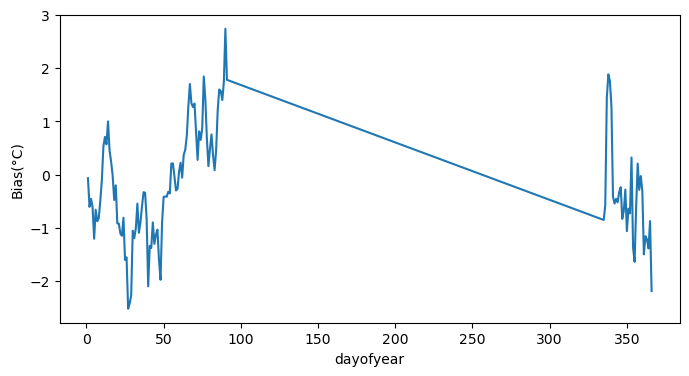

In [103]:
#i decided to calculate daily bias instead of monthly since we have just four months
#it does look a bit weird tho
bias_daily = era_daily-model_daily
plt.figure(figsize=(8, 4))
bias_daily.plot()
plt.ylabel('Bias(°C)')
plt.title('')

Text(0.5, 1.0, '')

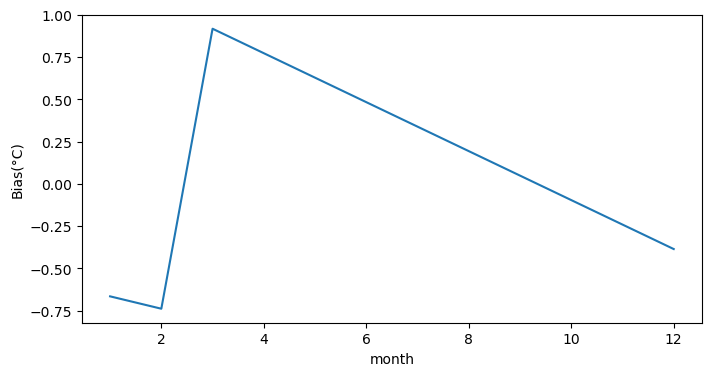

In [104]:
#monthly bias
bias_monthly = era_monthly-model_monthly
plt.figure(figsize=(8, 4))
bias_monthly.plot()
plt.ylabel('Bias(°C)')
plt.title('')

In [106]:
bias_monthly.to_netcdf('E://faks//cda//era5//bias_monthly.nc')